In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt

In [30]:
wine_data = pd.read_csv('/content/winequality-red.csv')


In [31]:
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [32]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [34]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. alcohol (0.18229955573907353)
2. total sulfur dioxide (0.10925754263166097)
3. sulphates (0.10664261879298888)
4. density (0.10612039617933718)
5. citric acid (0.0876006044739087)
6. volatile acidity (0.08397399039869556)
7. chlorides (0.07710235271801752)
8. pH (0.06912879386349276)
9. residual sugar (0.06784184825160493)
10. fixed acidity (0.06143413221957173)
11. free sulfur dioxide (0.04859816473164832)


In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.484375   0.45625    0.49375    0.509375   0.48275862]
Mean cross-validation score: 0.48530172413793105


In [36]:


# Display basic information and check for missing values
print(wine_data.info())
print(wine_data.describe())
print(wine_data.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

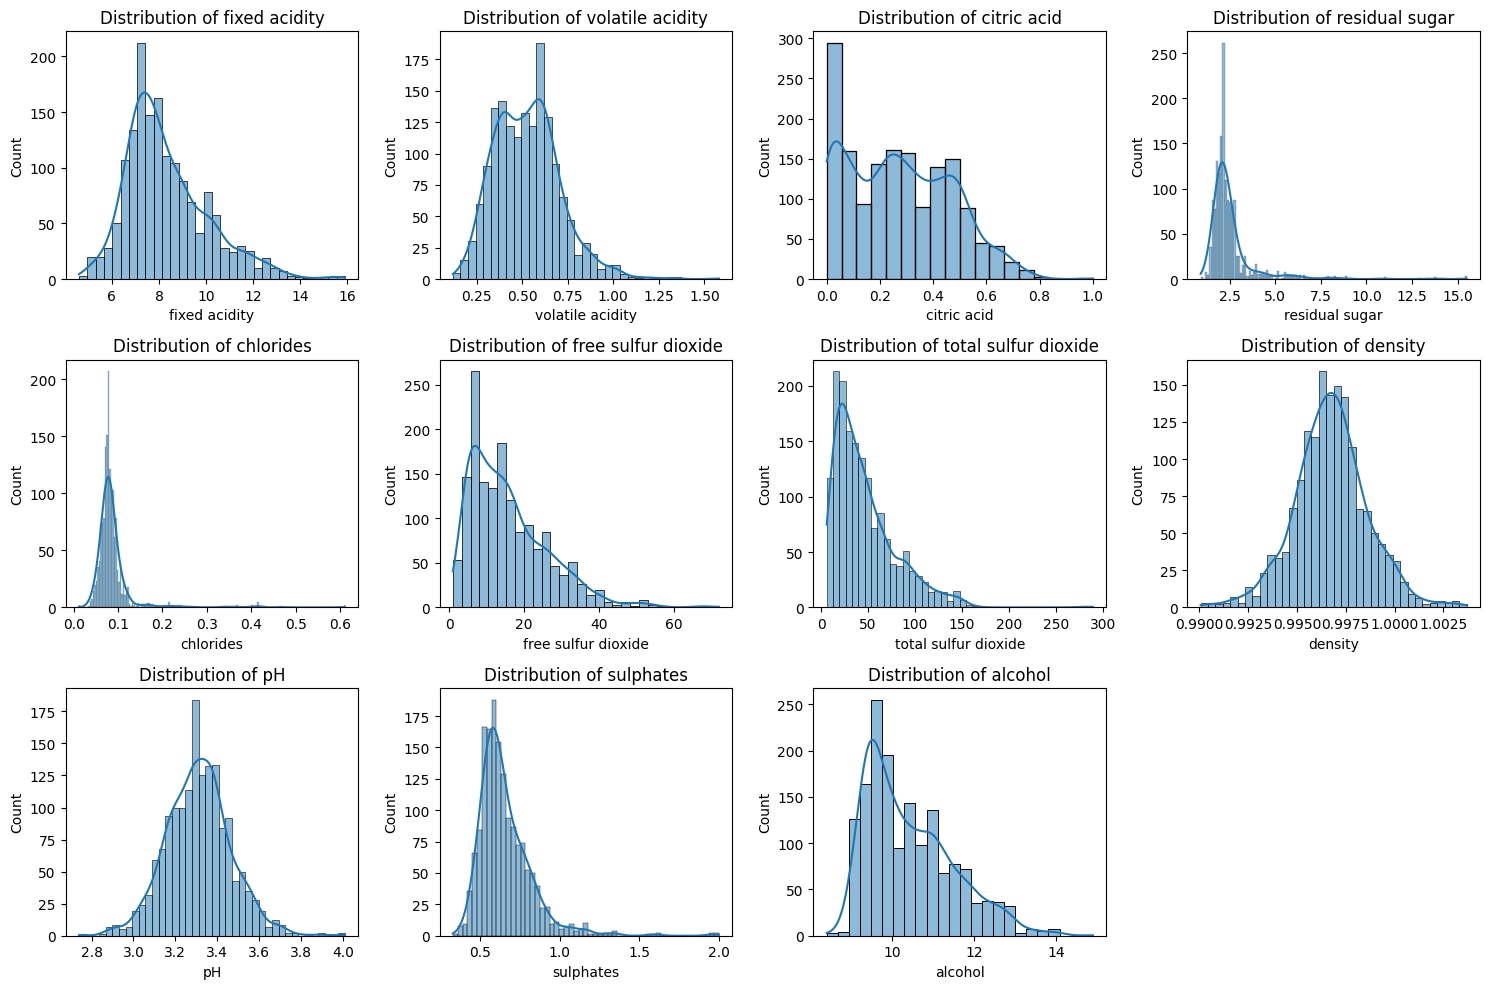

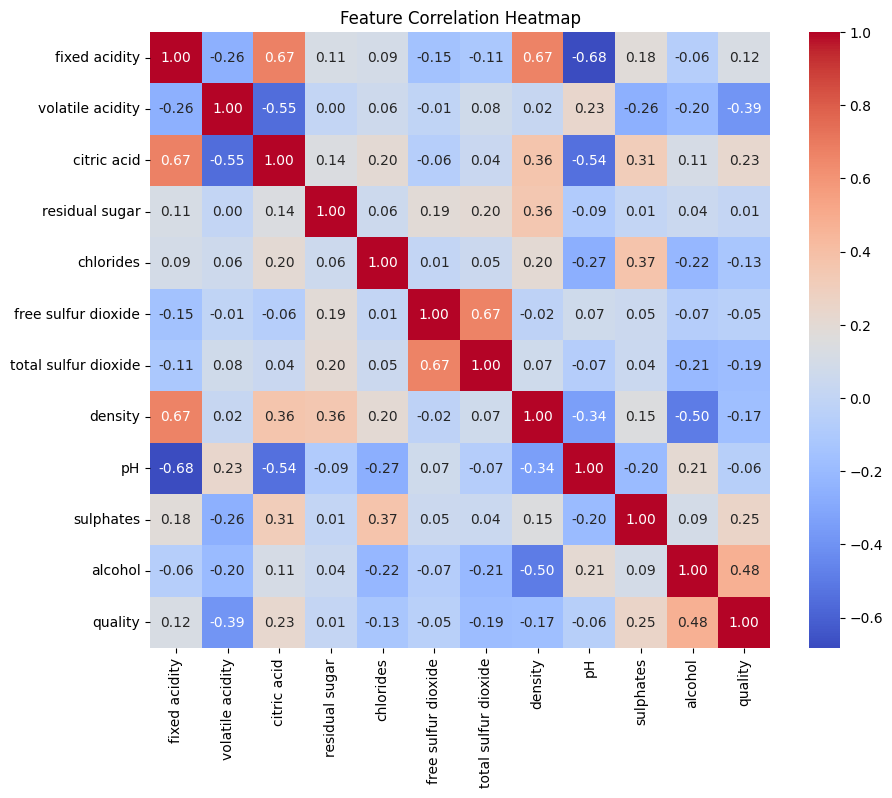

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area for visualizing feature distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(wine_data.columns[:-1], 1):
    plt.subplot(3, 4, i)
    sns.histplot(wine_data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Check correlations with a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [38]:
from sklearn.model_selection import train_test_split

# Binarize the target variable: quality
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Define features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the distribution of the target variable in the training set
print("Training target value distribution:\n", y_train.value_counts(normalize=True))


Training target value distribution:
 quality
1    0.528538
0    0.471462
Name: proportion, dtype: float64


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Train Random Forest
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rand_forest, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.74
Precision: 0.79
Recall: 0.73
F1 Score: 0.76

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320

--- Random Forest ---
Accuracy: 0.79
Precision: 0.81
Recall: 0.82
F1 Score: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320



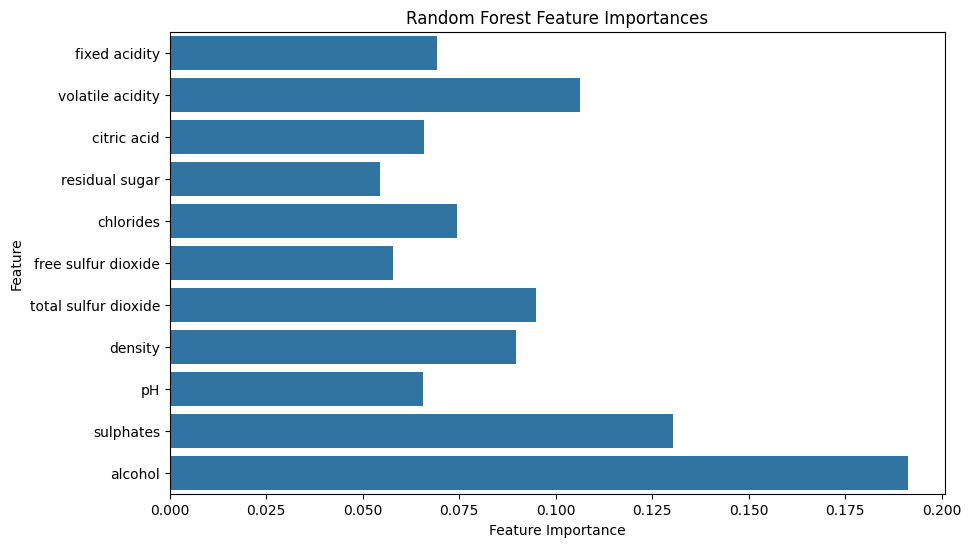

In [42]:
# Random Forest Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_importances = rand_forest.feature_importances_
features = X.columns
sns.barplot(x=feature_importances, y=features)
plt.title("Random Forest Feature Importances")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


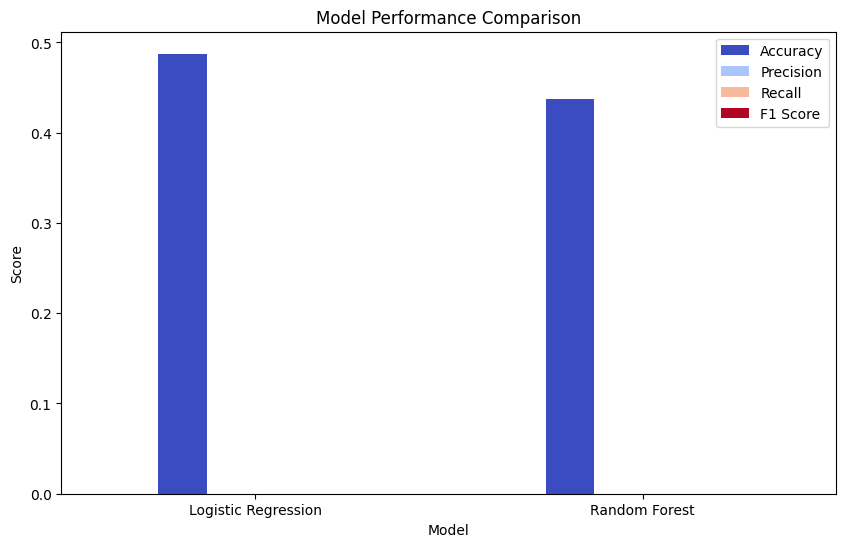

In [43]:
# Model Evaluation for Logistic Regression and Random Forest
metrics = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_rand_forest)],
    'Precision': [precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_rand_forest)],
    'Recall': [recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_rand_forest)],
    'F1 Score': [f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_rand_forest)]
}

metrics_df = pd.DataFrame(metrics)

# Plot the comparison
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()
